# K-Nearest Neighbour (KNN)

KNN is an essential classification algorithm which belongs to the supervised learning domain. The algorithm is very simple.<br/>
Whenever we want to classify a new data-point, we calculate its distance from the other data-points and take the nearest $k$ data-points.<br/>
Out of those $k$ points, whichever category has the largest number of data-points, that category is assigned to the new point.
# Manhattan distance
Manhattan Distance is the sum of absolute differences between 2 points across all the dimensions.<br/>The manhattan distance between 2 points: $(x_1, y_1)$ and $(x_2, y_2)$ can be calculated using this formula.
$$\text{abs}(x_2 - x_1) + \text{abs}(y_2 - y_1)$$
# Euclidean distance
It is the absolute distance between 2 points.<br/>The euclidean distance between 2 points: $(x_1, y_1)$ and $(x_2, y_2)$ can be calculated using this formula.
$$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$
***

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

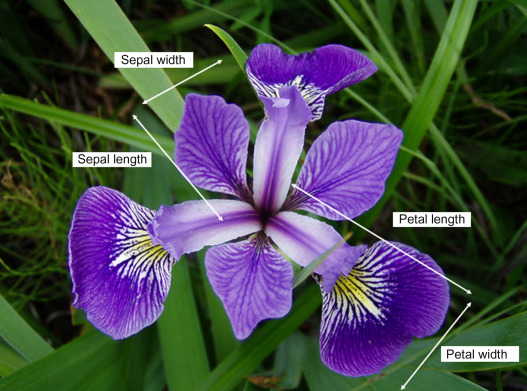
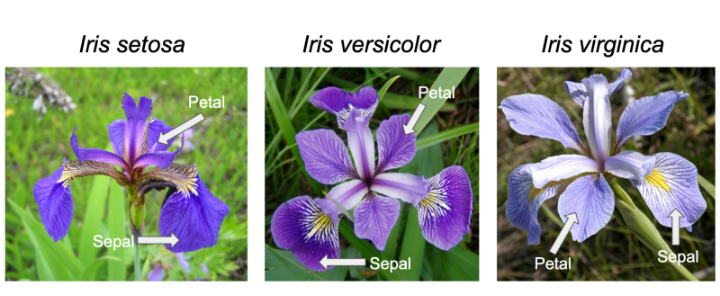

In [2]:
data_frame = pd.DataFrame(iris.data, columns = iris.feature_names)
data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data_frame["target"] = iris.target
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Setossa dataset

In [5]:
setossa = data_frame[data_frame["target"] == 0]
setossa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Versicolor dataset

In [6]:
versicolor = data_frame[data_frame["target"] == 1]
versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


# Virginica dataset

In [7]:
virginica = data_frame[data_frame["target"] == 2]
virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


# Visualizing the dataset

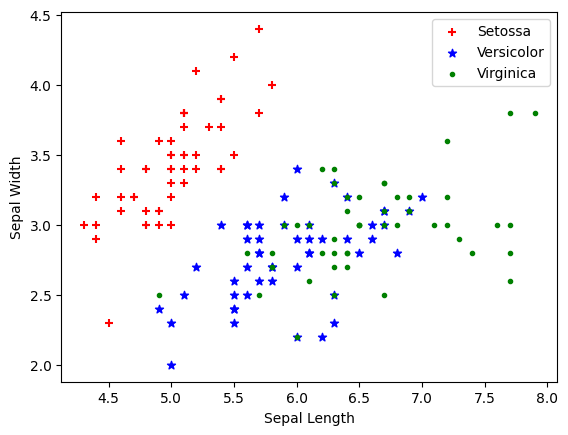

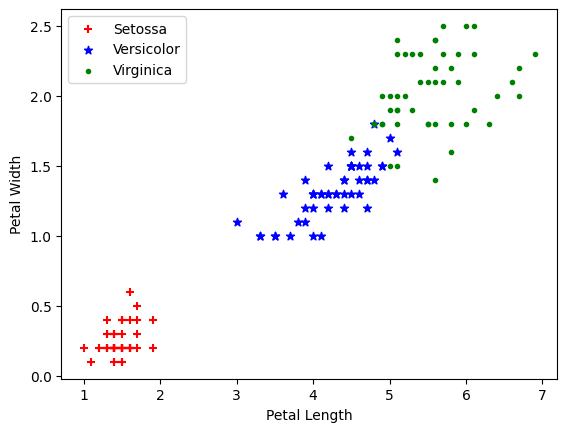

In [8]:
import matplotlib.pyplot as plt

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(setossa['sepal length (cm)'], setossa['sepal width (cm)'], color = 'red', marker = '+', label = "Setossa")
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], color = 'blue', marker = '*', label = "Versicolor")
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], color = 'green', marker = '.', label = "Virginica")
plt.legend(loc="upper right"); plt.show()

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(setossa['petal length (cm)'], setossa['petal width (cm)'], color = 'red', marker = '+', label = "Setossa")
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], color = 'blue', marker = '*', label = "Versicolor")
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], color = 'green', marker = '.', label = "Virginica")
plt.legend(loc="upper left"); plt.show()

# Training and testing the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = 1 is optimal
consume_output = knn.fit(iris.data, data_frame['target'])

In [10]:
score = knn.score(iris.data, data_frame['target'])
print(f"Model accuracy: {score * 100} %")

Model accuracy: 96.0 %


# Confusion Matrix Visualization

Text(50.722222222222214, 0.5, 'Truth')

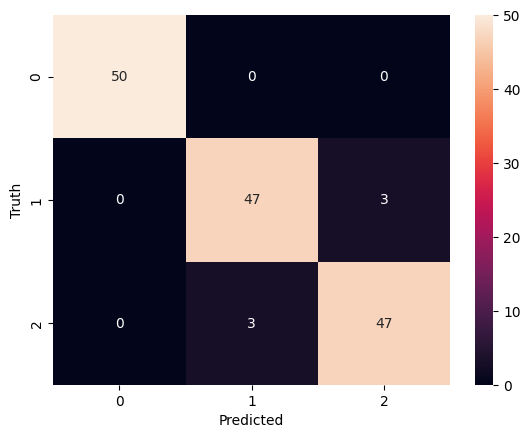

In [11]:
import seaborn as sbn
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(iris.data)

cnf_mat = confusion_matrix(data_frame['target'], y_pred)
sbn.heatmap(cnf_mat, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

***